In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import scatter_matrix

# data view print options
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 1000)

height has been deprecated.



# Загрузка и общее инфо о данных

In [2]:
# откорректировал один столюец, т.к. там какая-то лажа была, сделал интуитивно
data = pd.read_csv("pokemon_evolution_parameter_correct.csv", na_values='""')
#data = data['is_baby'].fillna(-1, axis=0)
print data.shape

# delete JP columns as duplicates
# and other garbage columns
data1 = data.drop('name_jp', axis=1);
data1 = data1.drop('name_jp_romaji', axis=1);
data1 = data1.drop('name_phonetic', axis=1);
data1 = data1.drop('species_jp', axis=1);
data1 = data1.drop('name', axis=1);
data = data1
print data.shape

(663, 38)
(663, 33)


In [ ]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print categorical_columns
print numerical_columns

In [ ]:
data[numerical_columns].describe()

In [ ]:
data[categorical_columns].describe()

Данные разряжённые. Судя по названиям столбцов некоторые из них являются сопроводительными (вроде legacy id).
Самый часто встречающийся с identifier rotom (встречается 6 раз) и species = Dragon (7 раз).

In [ ]:
'''
id : kdex, baby_breed_item_id 
generation_id : ndex, legacy_id, pokemon_order, baby_breed_item_id
ndex : kdex, udex, baby_breed_item_id, pokemon_order
baby_breed_item_id vs type2_id
jdex : jdex_old
hdex : baby_breed_item_id
baby_breed_item_id : type2_id, legacy_id
evolution_parent_pokemon_id : udex, pokemon_order
'''

# Влияющие друг на друга параметры
data1 = data.corr()
data1['baby_breed_item_id']>0.9 

Столбцы, на которые стоит обратить первое внимание. Они коррелируют друг с другом.
id,
kdex, hdex, ndex, udex, 
jdex, jdex_old,
baby_breed_item_id,
generation_id,
legacy_id,
pokemon_order,
baby_breed_item_id,
type2_id, evolution_parent_pokemon_id

# Знания из данных

### Поколения

ndex зависит от generation_id. ВОзможно это нумерация внутри  поколения, но с учётом сдвига количества предыдущих.

In [ ]:
data.plot.scatter(y='ndex', x='generation_id')

Опыт exp_yield у каждого поколений generation_id 1,2,3 распределён примерно одинаково, за исключением некоторых выбросов.

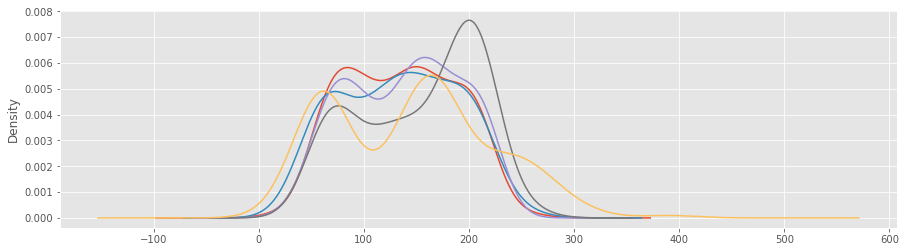

In [3]:
#data.plot.scatter(x='exp_yield', y ='generation_id')

plt.figure(1, figsize=(15,4))
#plt.subplot(1,2,1)


data[data['generation_id']==1]['exp_yield'].plot(kind='density')
data[data['generation_id']==2]['exp_yield'].plot(kind='density')
data[data['generation_id']==3]['exp_yield'].plot(kind='density')

#plt.figure(2)
#plt.subplot(1,2,2)
data[data['generation_id']==4]['exp_yield'].plot(kind='density')
data[data['generation_id']==5]['exp_yield'].plot(kind='density')

Количество покемонов по поколениям generation_id, включая детей:

                 0      1
generation_id            
1              NaN  151.0
2              8.0   92.0
3              2.0  136.0
4              8.0  108.0
5              NaN  158.0


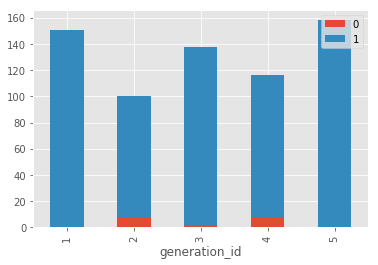

In [4]:
df = data[data['is_baby']==1].groupby('generation_id').size()
df1 = data[data['is_baby']==0].groupby('generation_id').size()
df2 = pd.DataFrame([df, df1]).T
df2.plot(kind='bar', stacked=True)
print df2


Самые счастливые base_happiness это 1 и 5-е generation_id поколения:

              1         2         3         4         5
count  6.000000  6.000000  6.000000  6.000000  6.000000
mean   0.166667  0.166667  0.166667  0.166667  0.166667
std    0.372829  0.327882  0.291913  0.287040  0.332352
min    0.000000  0.000000  0.000000  0.000000  0.000000
25%    0.006623  0.012500  0.009058  0.049569  0.018987
50%    0.013245  0.020000  0.032609  0.068966  0.022152
75%    0.034768  0.095000  0.148551  0.068966  0.077532
max    0.927152  0.830000  0.746377  0.750000  0.841772


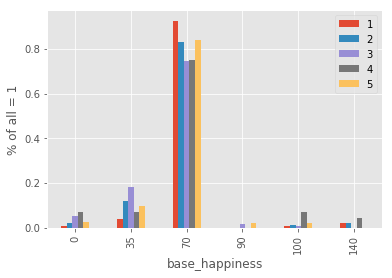

In [5]:
df = pd.DataFrame([data[data['generation_id']==1].groupby('base_happiness').size() / data[data['generation_id']==1].shape[0], 
                   data[data['generation_id']==2].groupby('base_happiness').size() / data[data['generation_id']==2].shape[0],
                   data[data['generation_id']==3].groupby('base_happiness').size() / data[data['generation_id']==3].shape[0],
                   data[data['generation_id']==4].groupby('base_happiness').size() / data[data['generation_id']==4].shape[0],
                   data[data['generation_id']==5].groupby('base_happiness').size() / data[data['generation_id']==5].shape[0]]).T.fillna(0)
df.columns = ['1','2','3','4','5']
dfplt1 = df.plot(kind='bar')
dfplt1.set_ylabel('% of all = 1')
print df.describe()

Распределение типов покемонов по поколениям

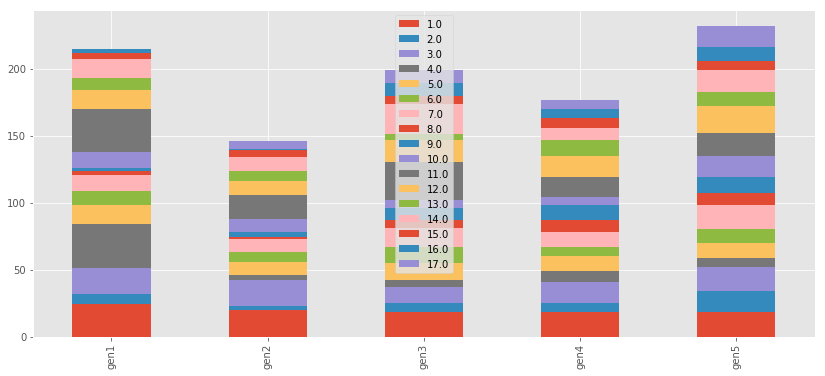

In [8]:
datag1 = data[data['generation_id']==1]
df1 = pd.DataFrame(datag1.groupby('type1_id').size())
df2 = pd.DataFrame(datag1.groupby('type2_id').size())
datag1 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

datag2 = data[data['generation_id']==2]
df1 = pd.DataFrame(datag2.groupby('type1_id').size())
df2 = pd.DataFrame(datag2.groupby('type2_id').size())
datag2 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

datag3 = data[data['generation_id']==3]
df1 = pd.DataFrame(datag3.groupby('type1_id').size())
df2 = pd.DataFrame(datag3.groupby('type2_id').size())
datag3 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

datag4 = data[data['generation_id']==4]
df1 = pd.DataFrame(datag4.groupby('type1_id').size())
df2 = pd.DataFrame(datag4.groupby('type2_id').size())
datag4 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

datag5 = data[data['generation_id']==5]
df1 = pd.DataFrame(datag5.groupby('type1_id').size())
df2 = pd.DataFrame(datag5.groupby('type2_id').size())
datag5 = pd.concat([df1, df2], axis=1).T.fillna(0).sum().T

dataGenType = pd.DataFrame( {'gen1' : datag1, 'gen2' : datag2, 'gen3' : datag3, 
                             'gen4' : datag4, 'gen5' : datag5}).fillna(0).T#.sum().sort_values()
dataGenType.plot(kind='bar', stacked=True, figsize=(14,6))

два самых встречаемых типа покемонов: 1-й и 11-й

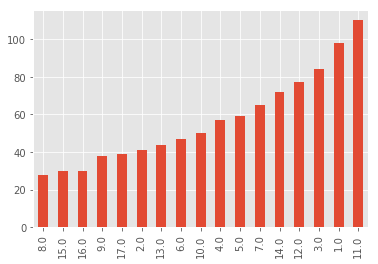

In [10]:
dataGenType = dataGenType.T
dataGenType.T.sum().sort_values().plot(kind='bar')

11.9470198675
11.63
12.3985507246
11.3017241379
10.3101265823


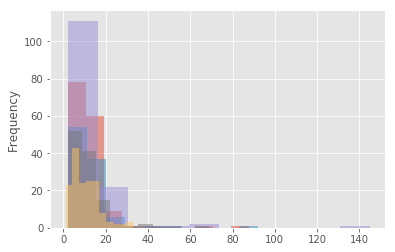

In [13]:
print data[data['generation_id']==1]['height'].mean()
print data[data['generation_id']==2]['height'].mean()
print data[data['generation_id']==3]['height'].mean()
print data[data['generation_id']==4]['height'].mean()
print data[data['generation_id']==5]['height'].mean()

data[data['generation_id']==1]['height'].plot(kind='hist', alpha=0.5)
data[data['generation_id']==2]['height'].plot(kind='hist', alpha=0.5)
data[data['generation_id']==3]['height'].plot(kind='hist', alpha=0.5)
data[data['generation_id']==4]['height'].plot(kind='hist', alpha=0.5)
data[data['generation_id']==5]['height'].plot(kind='hist', alpha=0.5)

Существуют ли покемоны, которые меняют свой тип при эволюционировании?
Да, существуют. Из всей серии таких всего 35.

In [213]:
i = 0
count = 0
while i < data.shape[0]-1 :

    idParent = data['evolution_parent_pokemon_id'][i]
    if np.isnan(idParent):
        idParent = 0
    if idParent == 0:
        i = i+1
        continue
    isSameType = not ((data['type1_id'][i] == data['type1_id'][idParent]) or (
        data['type1_id'][i] == data['type2_id'][idParent]) or(
        data['type2_id'][i] == data['type1_id'][idParent]) or(
        data['type2_id'][i] == data['type2_id'][idParent]))
    if isSameType: 
        print 'id = ', data['id'][i], 'type1 =', data['type1_id'][i], 'typeParent =', data['type1_id'][idParent]
        count = count + 1
    i = i+1
print count

id =  25 type1 = 13 typeParent = 1
id =  122 type1 = 14 typeParent = 1
id =  124 type1 = 15 typeParent = 13
id =  125 type1 = 13 typeParent = 10
id =  126 type1 = 10 typeParent = 1
id =  135 type1 = 13 typeParent = 11
id =  136 type1 = 10 typeParent = 11
id =  143 type1 = 1 typeParent = 2
id =  183 type1 = 11 typeParent = 6
id =  185 type1 = 6 typeParent = 14
id =  196 type1 = 14 typeParent = 11
id =  197 type1 = 17 typeParent = 11
id =  202 type1 = 14 typeParent = 15
id =  208 type1 = 9 typeParent = 14
id =  212 type1 = 7 typeParent = 15
id =  226 type1 = 11 typeParent = 12
id =  233 type1 = 1 typeParent = 6
id =  242 type1 = 1 typeParent = 12
id =  358 type1 = 14 typeParent = 4
id =  424 type1 = 1 typeParent = 12
id =  429 type1 = 8 typeParent = 14
id =  430 type1 = 17 typeParent = 11
id =  461 type1 = 17 typeParent = 1
id =  462 type1 = 13 typeParent = 1
id =  463 type1 = 1 typeParent = 4
id =  464 type1 = 5 typeParent = 1
id =  465 type1 = 12 typeParent = 1
id =  466 type1 = 13 typ

In [ ]:
datag1 = data[data['generation_id']==1]
plt.figure(1, figsize=(50,6))
plt.xticks(range(datag1.shape[0]-1))

df = pd.DataFrame({'id':[], 'type1' :[], 'type2' :[]})
i = 0
while i < datag1.shape[0]-1 :
    #print 'i = ', i
    if datag1['evolution_parent_pokemon_id'][i+1] == datag1['id'][i]: 
        df1 = pd.DataFrame({'id':[datag1['id'][i]], 'type1':[datag1['type1_id'][i]], 'type2':[datag1['type2_id'][i]] } )
        df = pd.concat([df, df1])
        #print datag1['id'][i]
        
    if i>0 and datag1['evolution_parent_pokemon_id'][i] == datag1['id'][i-1] and datag1['evolution_parent_pokemon_id'][i+1] != datag1['id'][i]:
        df1 = pd.DataFrame({'id':[datag1['id'][i]], 'type1':[datag1['type1_id'][i]], 'type2':[datag1['type2_id'][i]] } )
        df = pd.concat([df, df1])
        #print df
        plt.plot(df['id'], df['type1'], marker='x', c='#222222')
        plt.plot(df['id'], df['type2'], marker='x', c='#229922')
        df = pd.DataFrame({'id':[], 'type1' :[], 'type2' :[]})
        
        
    i = i+1


In [ ]:
#data[numerical_columns][data['weight']<1250][data['height']<11].plot.scatter(y='weight', x='height', c='is_baby')
#data[data['is_baby']==1]

#data.plot.scatter(y='generation_id', x='is_baby')
#data.plot.scatter(y='lvl_100_exp', x='is_baby')
#data.plot.scatter(y='ndex', x='is_baby')
#data.plot.scatter(y='kdex', x='is_baby')
#data.plot.scatter(y='jdex', x='is_baby')
#data.plot.scatter(y='jdex_old', x='is_baby')
#data.plot.scatter(y='hdex', x='is_baby')
#data.plot.scatter(y='sdex', x='is_baby')

#data.plot.scatter(y='type1_id', x='is_baby')
#data.plot.scatter(y='type2_id', x='is_baby')
#data.plot.scatter(y='ability1_id', x='is_baby')
#data.plot.scatter(y='ability2_id', x='is_baby')
#data.plot.scatter(y='abilitydream_id', x='is_baby')
#data.plot.scatter(y='evolution_parent_pokemon_id', x='is_baby')
#data.plot.scatter(y='height', x='is_baby')
#data.plot.scatter(y='weight', x='is_baby')
#data.plot.scatter(y='gender_rate', x='is_baby')
#data.plot.scatter(y='catch_rate', x='is_baby')
#data.plot.scatter(y='exp_yield', x='is_baby')
#data.plot.scatter(y='base_happiness', x='is_baby')
#data.plot.scatter(y='egg_group1_id', x='is_baby')
#data.plot.scatter(y='egg_group2_id', x='is_baby')
#data.plot.scatter(y='baby_breed_item_id', x='is_baby')
#data.plot.scatter(y='hatch_counter', x='is_baby')
#data.plot.scatter(y='lvl_100_exp', x='is_baby')
#data.plot.scatter(y='pokemon_order', x='is_baby')
#data.plot.scatter(y='legacy_id', x='is_baby')
#data.plot.scatter(y='is_baby', x='is_baby')
#data.plot.scatter(y='is_baby', x='evolution_parameter')

- дети не имеют параметра kdex, evolution_parent_pokemon_id;
data[data['is_baby']==1]['kdex'].describe()
- дети обычно рождаются высотой (height) <= 10 и весом < 1150 ;
data[data['height']<17].plot.scatter(y='height',  x='is_baby')
data[data['weight']<1150].plot.scatter(y='weight',  x='is_baby')
- каждый ребёнок имеет egg_group1_id == 15 и не имеет egg_group2_id. При этом не все взрослые имеют egg_group2_id;
data[data['is_baby']==1]['egg_group1_id']


ndex по уровням зависит от generation_id

Базовое счастье не зависит от того ребёнок или нет:

In [ ]:
data[data['is_baby']==1]['base_happiness'].plot()
data[data['is_baby']==0]['base_happiness'].plot()

Дети и взрослые в целом одинаково счастливые. Среди взрослых есть менее счастливые, в то время как среди детей такого нет.

In [ ]:
# Категориальные признаки превращаем в числовые.
'''
data_describe = data.describe(include=[object])
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print nonbinary_columns

data['species'].unique()
'''

In [ ]:
#data[data['height'] < 20][data['weight'] < 1000].plot.scatter(x='weight', y='height', c='base_happiness')
#data.plot.scatter(x='weight', y='height', c='base_happiness')
#scatter_matrix(data[['type1_id','hdex','ndex','kdex','jdex','jdex_old','sdex','udex']], figsize=(9, 9))

#data[data['id']>700].plot.scatter(x='type1_id', y='id')
#data[data['hatch_counter']>60][''].plot()

#data.plot.scatter(y='base_happiness', x='generation_id')
#data['identifier']

In [ ]:
#data.groupby('evolution_parameter').size().sort(inplace=False, ascending=False) 


data.plot.scatter(x='evolution_parameter', y='evolution_parent_pokemon_id', c ='generation_id')

kdex vs jdex
udex vs ndex

исследовать
type1_id=3 заметил на  generation_id, dex, udex, ability1_id, abilitydream_id
    

In [ ]:
data.plot.scatter(x='generation_id', y='baby_breed_item_id')

In [ ]:
Какой хороший стартовый покемон? критерии хорошести: не злой, сильный и т.п.
Хороший базовый набор нескольких покемонов?
Более высокие покемоны - более счастливые?
Более толстые счастливые?
Кластеризация по типам, способностям